In [2]:
# 사용한 라이브러리

import pandas
import matplotlib.pyplot as plt
import numpy
from sklearn.linear_model import LinearRegression

In [107]:
# 데이터 가져오기, 데이터 행렬 뒤집기

df = pandas.read_csv(r'D:\dbdpr\resources\변화율 데이터 테이블.csv')
df_transposed = df.T

if not df_transposed.empty:
    df_transposed.columns = df_transposed.iloc[0]
    df_transposed = df_transposed[1:]
    df_transposed.reset_index(drop = True, inplace = True)

df_transposed

품목/변화율,총지수,식료품 및 비주류음료,주류 및 담배,의류 및 신발,"주택, 수도, 전기 및 연료",가정용품 및 가사 서비스,보건,교통,통신,오락 및 문화,교육,음식 및 숙박,기타 상품 및 서비스
0,0.972,2.308,0.687,1.796,-0.815,1.553,0.985,-2.215,0.084,1.843,1.635,2.51,3.442
1,1.944,3.398,1.507,1.085,1.695,1.097,0.886,3.582,0.29,0.052,1.147,2.395,2.773
2,1.476,2.773,0.261,1.108,0.704,2.26,-0.052,2.419,-0.857,0.487,1.369,3.019,0.59
3,0.384,0.047,0.625,0.102,1.153,2.137,0.467,-1.793,-2.292,-0.246,0.524,1.818,1.605
4,0.54,4.43,0.32,0.74,0.51,0.03,1.51,-1.83,-2.07,-1.01,-2.13,0.95,1.96
5,2.5,5.89,0.43,0.56,1.63,1.87,-0.08,6.33,-0.9,0.43,0.87,2.73,2.0
6,5.09,5.91,2.18,3.13,5.47,4.82,0.84,9.73,0.93,2.85,1.35,7.59,6.15
7,3.59,5.47,0.98,6.7,5.08,5.41,1.63,-3.41,1.02,3.66,1.96,6.0,5.81
8,2.32,3.87,0.9,3.33,1.66,2.01,1.89,1.38,0.26,1.41,1.71,3.08,4.09


46
평균 변화율 : 0.289 %


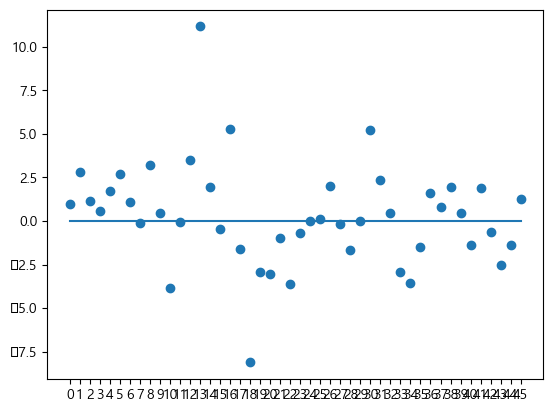

In [7]:
# 데이터 시각화

total = [0.971, 2.803, 1.118, 0.542, 1.704, 2.708, 1.096, -0.134, 3.213, 0.441, -3.834, -0.072, 3.479, 11.159, 1.954, -0.459, 5.258, -1.615, -8.122, -2.914, -3.058, -0.996, -3.635, -0.686, 0.004, 0.134, 2.02, -0.202, -1.671, -0.005, 5.223, 2.33, 0.465, -2.902, -3.553, -1.474, 1.583, 0.787, 1.947, 0.466, -1.399, 1.906, -0.626, -2.554, -1.392, 1.263]

# for i in df_transposed['총지수']:
#     total.append(i)

print(len(total))
X = numpy.array(total)
Y = numpy.array([str(i) for i in range(46)])
Y2 = numpy.array([i for i in range(46)])
LINE = numpy.array([0 for _ in range(46)])

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.scatter(Y, X)
plt.plot(LINE)

print('평균 변화율 :', round(sum(total) / len(total), 3), '%')

In [20]:
# 선형 회귀 모델

# 환율, 본원 통화, 유가(휘발유)
X = numpy.array(
    [
    # [-14.035, -12.245, -6.977, 0.0, -5.0, -15.789, -18.75, 3.846, 3.704, -7.143, 34.615, 17.143, -17.073, -11.765, 0.0, 0.0, 0.0, -3.333, -27.586, 14.286, 0.0, -4.167, 30.435, 20.0, -13.889, -6.452, -3.448, -3.571, 0.0, 0.0, -25.926, 15.0, -8.696, 9.524, 43.478, 12.121, -13.514, -6.25, 0.0, 0.0, -3.333, -13.793, -24.0, 10.526, 9.524, -4.348],
    [1.297, 0.691, 0.17, 0.177, 0.689, 1.146, 1.43, 0.793, 1.135, 0.008, 0.067, 0.871, 0.363, 1.893, 0.926, 1.21, 1.814, 0.068, 0.52, 0.701, 0.771, 0.038, 0.561, 0.134, 0.128, 0.229, 0.614, 0.002, 0.117, 0.27, 0.351, 0.095, 0.093, 0.078, 0.231, 1.189, 0.256, 0.506, 0.228, 0.095, 0.114, 0.064, 0.54, 0.357, 0.235, 0.454],
    [0.875, 2.875, 0.134, 0.878, 2.122, 0.294, 0.711, 0.826, 2.28, 1.464, 0.416, 0.024, 1.481, 0.882, 1.19, 0.292, 0.017, 2.617, -2.199, 0.301, 1.311, -2.066, -0.153, -2.385, 1.309, -1.112, 0.196, 1.615, -0.785, 1.234, -0.141, -0.675, -0.163, 0.299, 0.203, 1.349, -0.659, 1.665, 0.081, 0.56, -0.677, 1.616, -0.011, 0.183, 0.76, 0.238],
    [0.971, 2.803, 1.118, 0.542, 1.704, 2.708, 1.096, -0.134, 3.213, 0.441, -3.834, -0.072, 3.479, 11.159, 1.954, -0.459, 5.258, -1.615, -8.122, -2.914, -3.058, -0.996, -3.635, -0.686, 0.004, 0.134, 2.02, -0.202, -1.671, -0.005, 5.223, 2.33, 0.465, -2.902, -3.553, -1.474, 1.583, 0.787, 1.947, 0.466, -1.399, 1.906, -0.626, -2.554, -1.392, 1.263]
    ]
)

# 소비자 물가 지수
Y2 = numpy.array([0.534, 0.256, 0.137, 0.069, 0.0, 0.206, 0.479, 0.409, 0.174, 0.503, 0.164, 0.779, 0.544, 0.645, 0.688, 0.627, 0.66, 0.481, -0.092, 0.175, 0.312, -0.082, 0.174, 0.741, 0.236, 0.172, 0.226, 0.325, 0.027, 0.117, 0.89, 0.508, 0.372, -0.521, 0.044, 0.39, 0.539, 0.149, 0.053, 0.079, -0.228, 0.255, 0.359, 0.096, 0.035, -0.253])

model = LinearRegression()
model.fit(X.T, Y2.reshape(-1, 1))

# 모델(선형 회귀)

print('절편(b) :', model.intercept_[0])
print('회귀 계수 :', model.coef_)

b = model.intercept_[0]
w = model.coef_

model.predict(X.T)
model.score(X.T, Y2.reshape(-1, 1))

절편(b) : 0.1905045755040678
회귀 계수 : [[ 0.15073887 -0.01764148  0.0368988 ]]


0.2710832755484661

In [18]:
# 모델 실험

inputs = list(map(float, input().split()))

print(round(
            b + sum(inputs[i] * w[0][i] for i in range(len(inputs)))
            , 3))

# 2024(1월) 2025(1월) -> 2.2 % 상승

# 환율 11.3%
# 본원 통화 4.4%
# 휘발유 가격 8.3%

# 예측 : 2.122 % 상승

2.122
